<a href="https://colab.research.google.com/github/khatamirock/colabs_AI_LAB/blob/main/linear_regression_coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone 'https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
from utils import *
%matplotlib inline

In [ ]:
data='/content/Machine-Learning-Specialization-Coursera/C1 - Supervised Machine Learning - Regression and Classification/week2/C1W2A1/data/ex1data1.txt'
df=pd.read_csv(data, sep=',',header =None,names=['pop','prc'])
df.head()

,pop,prc
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data = np.loadtxt(data, delimiter=',')
X = data[:,0]
y = data[:,1]

X[:10]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781,
       6.4862, 5.0546])

In [ ]:
x_train,y_train = df['pop'].values,df['prc'].values


In [ ]:
# print y_train
print("Type of y_train:",type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [17.592   9.1302 13.662  11.854   6.8233]


In [ ]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


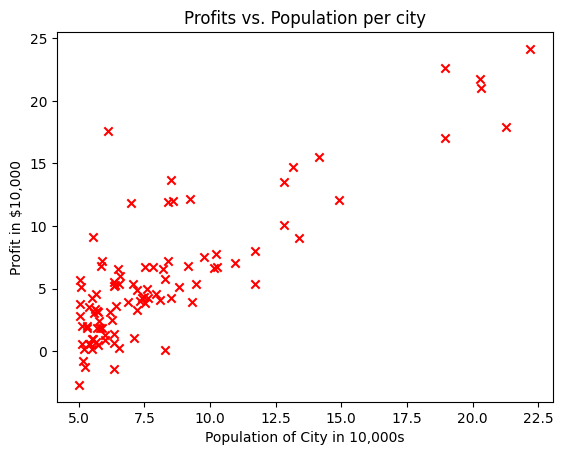

In [ ]:
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("Profits vs. Population per city")
# Set the y-axis label
plt.ylabel('Profit in $10,000')
# Set the x-axis label
plt.xlabel('Population of City in 10,000s')
plt.show()

In [ ]:
def calc_pred(w,x,b):
  return w*x+b
def cost_func(x,y,w,b):
  m=len(x_train)
  sm=0
  for i in range(m):
    cal=calc_pred(w,x[i],b)
    sm+=(cal-y[i])**2
  return sm/(2*m)





In [ ]:
# Compute cost with some initial values for paramaters w, b
initial_w = .8
initial_b = -0.9
# can change w& b to minimize cost can play with w &b to see the effect
# now we need to tune that effectively
cost=cost_func(x_train,y_train,initial_w,initial_b)
cost

5.6440813304618525

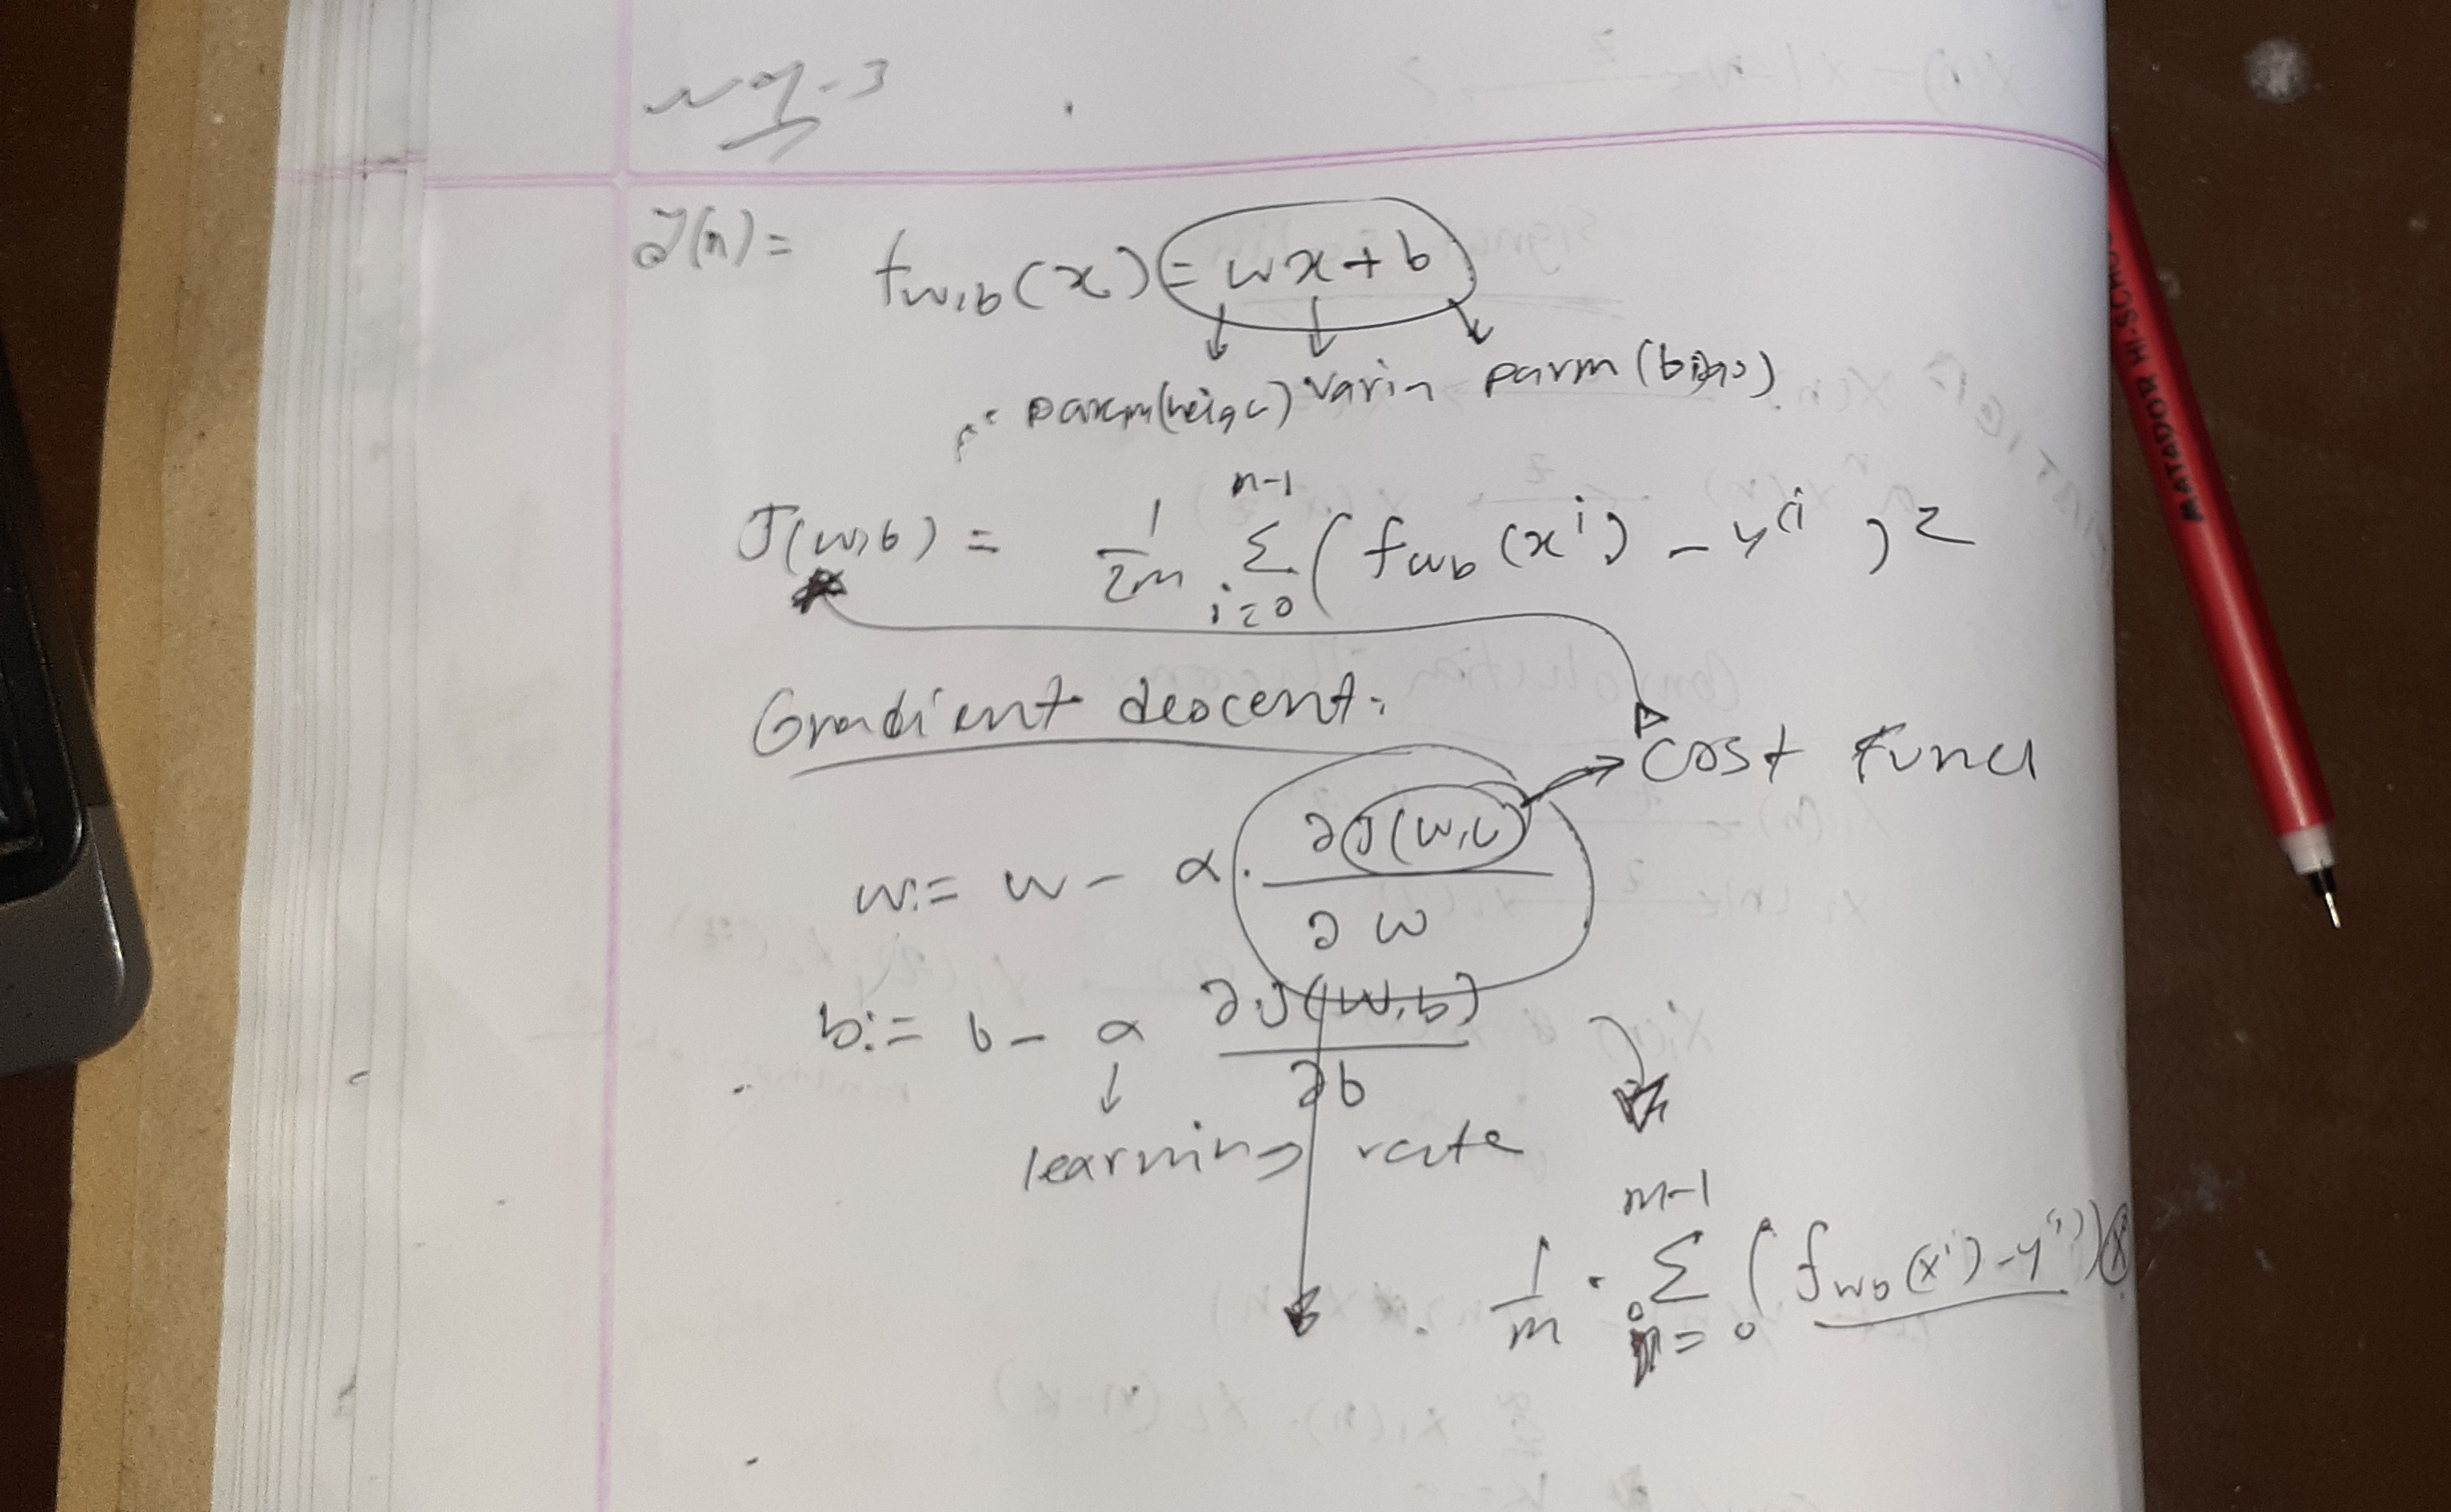

In [ ]:
def grad_desc(x,y,w,b):
  m=len(x_train)
  dj_dw=0
  dj_db=0
  for i in range(m):
    cal=calc_pred(w,x[i],b)
    dj_dw+=(cal-y[i])*x[i]
    dj_db+=(cal-y[i])
  return dj_dw/(m),dj_db/m


In [ ]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = grad_desc(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [54]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):


    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

In [64]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 2500
alpha = 0.01

w,b,jhist,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     cost_func, grad_desc, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  250: Cost     5.06   
Iteration  500: Cost     4.71   
Iteration  750: Cost     4.57   
Iteration 1000: Cost     4.52   
Iteration 1250: Cost     4.49   
Iteration 1500: Cost     4.48   
Iteration 1750: Cost     4.48   
Iteration 2000: Cost     4.48   
Iteration 2250: Cost     4.48   
w,b found by gradient descent: 1.1886434853952736 -3.8520806813360893


In [66]:
print(jhist)

[6.737190464870008, 5.931593568604957, 5.901154707081387, 5.89522858644422, 5.890094943117333, 5.885004158443646, 5.879932480491416, 5.874879094762575, 5.8698439118063845, 5.8648268653129305, 5.8598278899321805, 5.85484692057229, 5.849883892376585, 5.844938740722036, 5.840011401218365, 5.835101809707228, 5.830209902261389, 5.825335615183866, 5.820478885007098, 5.8156396484921515, 5.81081784262787, 5.806013404630042, 5.801226271940627, 5.796456382226899, 5.791703673380652, 5.786968083517397, 5.782249550975539, 5.777548014315598, 5.772863412319381, 5.768195683989212, 5.76354476854712, 5.758910605434049, 5.754293134309077, 5.7496922950486296, 5.745108027745686, 5.740540272709014, 5.735988970462384, 5.7314540617437935, 5.7269354875047025, 5.722433188909259, 5.717947107333528, 5.713477184364749, 5.709023361800547, 5.704585581648199, 5.700163786123851, 5.695757917651815, 5.69136791886375, 5.6869937325979825, 5.6826353018987055, 5.6782925700152935, 5.673965480401505, 5.669653976714796, 5.6653

Text(0, 0.5, 'Cost')

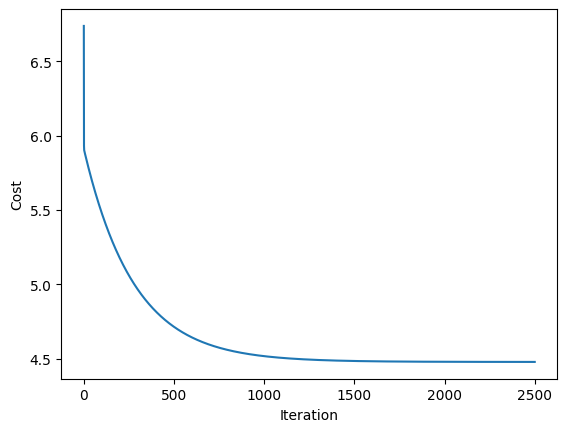

In [67]:
plt.plot(range(2500),jhist)
plt.xlabel("Iteration")
plt.ylabel("Cost")

In [68]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

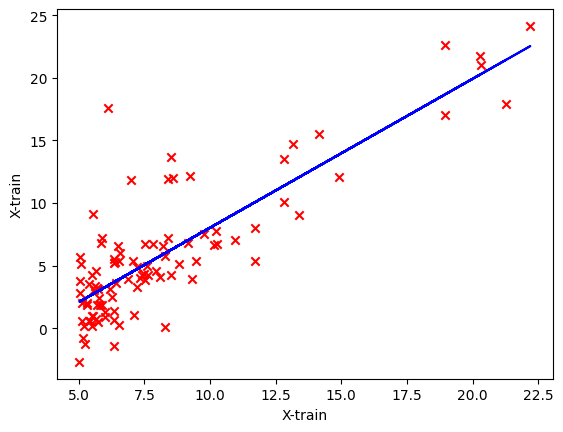

In [70]:
plt.plot(x_train,predicted,c='b')
plt.scatter(x_train,y_train,marker='x',c='r')
plt.xlabel("X-train")
plt.ylabel("X-train")
plt.show()

In [71]:
predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $3081.72
For population = 70,000, we predict a profit of $44684.24
